In [64]:
%load_ext autoreload
%autoreload 1

import sys
sys.path.append("../utils/")

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, MaxAbsScaler, RobustScaler

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from GraphAPI import GraphCreator
from graph_helpers import *
from evaluations import *

%aimport GraphAPI
%aimport graph_helpers
%aimport evaluations

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Network Creation:

In [4]:
gc = GraphCreator("Decision tree", include_see_also=True) 
print("First Layer Nodes:\t", len(gc.graph.nodes))

First Layer Nodes:	 224


In [5]:
# Network Expansion to 2nd layer
gc.expand_network(group_size=2, timeout=5, log_progress=False)

# Handling Redirects
gc.redraw_redirects()

# Adding edge weights
gc.update_edge_weights()

# Compiling feature set
gc.get_features_df(rank=False)

# Ranking similarity
gc.rank_similarity()

In [25]:
# Scaling features (making a new copy)
scaled_feature_df = gc.scale_features_df(scaler=MinMaxScaler, copy=True).sort_values("similarity_rank", ascending=False).reset_index().drop("index", axis=1)

scaled_feature_df

,node,degree,category_matches_with_source,in_edges,out_edges,shared_neighbors_with_entry_score,centrality,page_rank,adjusted_reciprocity,shortest_path_length_from_entry,shortest_path_length_to_entry,jaccard_similarity,primary_link,similarity_rank
0,Decision tree,0.013529,1.0,0.009044,0.028467,1.000000,3.094450e-01,5.549655e-03,0.062615,0.000,0.0,1.000000,0.0,1.000000e+00
1,"Behavior tree (artificial intelligence, roboti...",0.001278,1.0,0.000321,0.006289,0.016807,7.349962e-02,3.389229e-04,0.007366,0.125,0.2,0.017442,1.0,3.992625e-01
2,Decision tree model,0.002024,1.0,0.000749,0.008275,0.020000,2.944397e-02,6.139046e-04,0.009208,0.125,0.2,0.022346,1.0,3.888029e-01
3,Decision table,0.002770,1.0,0.001659,0.007282,0.034884,1.834208e-02,9.888989e-04,0.012891,0.125,0.2,0.020408,1.0,3.828212e-01
4,Decision analysis,0.006285,1.0,0.003746,0.016220,0.065359,4.208567e-02,2.031576e-03,0.025783,0.125,0.2,0.039130,1.0,3.543853e-01
5,Random forest,0.015500,1.0,0.008563,0.043694,0.055961,4.980781e-01,4.550013e-03,0.145488,0.125,0.2,0.051118,1.0,3.066370e-01
6,Decision tree learning,0.017418,1.0,0.009205,0.051639,0.067442,4.393992e-01,4.614095e-03,0.165746,0.125,0.2,0.052469,1.0,2.948904e-01
7,Decision list,0.000852,0.0,0.000321,0.003641,0.017167,6.126917e-02,2.203265e-04,0.001842,0.125,0.2,0.017442,1.0,2.052230e-01
8,Influence diagram,0.002823,1.0,0.001070,0.011255,0.063492,6.985987e-02,9.309832e-04,0.012891,0.125,0.2,0.038462,0.0,2.032932e-01
9,Information gain in decision trees,0.002823,1.0,0.000589,0.014234,0.042802,6.639046e-02,3.342313e-04,0.012891,0.125,0.2,0.028571,0.0,1.992322e-01


___
# Clustering

In [73]:
kmeans = KMeans(n_clusters=2, n_jobs=-1)

top_recommendations = scaled_feature_df[0:10000].copy() # top 100 clusters

clusters = kmeans.fit(top_recommendations.drop(["node", "similarity_rank", "page_rank"], axis=1))

clustered_df = top_recommendations.copy()

clustered_df["cluster"] = clusters.labels_

print(clustered_df.cluster.value_counts())
clustered_df[["node", "cluster"]]

0    7729
1    2271
Name: cluster, dtype: int64


,node,cluster
0,Decision tree,0
1,"Behavior tree (artificial intelligence, roboti...",0
2,Decision tree model,0
3,Decision table,0
4,Decision analysis,0
5,Random forest,0
6,Decision tree learning,0
7,Decision list,0
8,Influence diagram,0
9,Information gain in decision trees,0


In [61]:
pca = PCA(n_components=2)

transformed = pd.DataFrame(pca.fit_transform(clustered_df.drop("node", axis=1)), columns=["PCA-1", "PCA-2"])

transformed['cluster'] = clustered_df["cluster"]

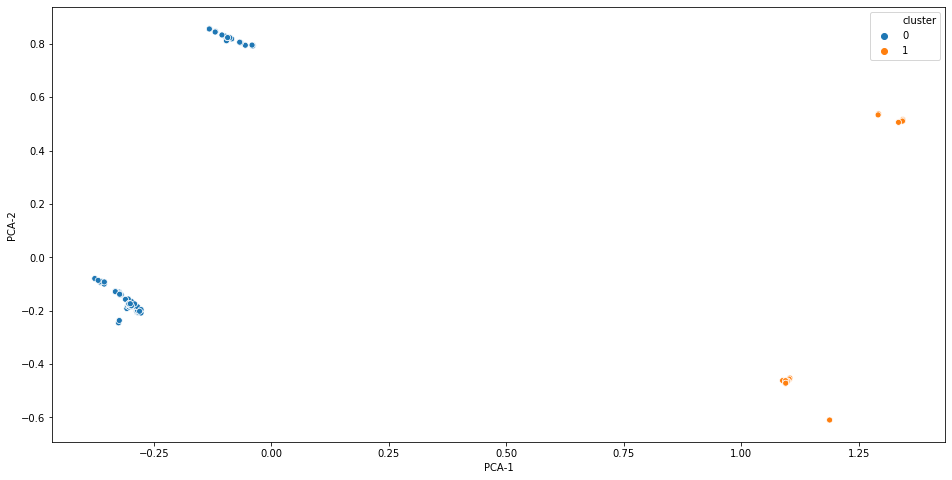

In [62]:
plt.figure(figsize=(16,8))

sns.scatterplot(data=transformed, x="PCA-1", y="PCA-2", hue="cluster")

# Semi-Supervised Clustering

In [90]:
top_recommendations = scaled_feature_df[1:21].copy()

top_recommendations[['node']]

,node
1,"Behavior tree (artificial intelligence, roboti..."
2,Decision tree model
3,Decision table
4,Decision analysis
5,Random forest
6,Decision tree learning
7,Decision list
8,Influence diagram
9,Information gain in decision trees
10,ID3 algorithm


In [92]:
before = [
    "Decision tree model", 
    "Behavior tree (artificial intelligence, robotics and control)",
    "Decision table",
    "Decision list",
    "Influence diagram",
]


after = [
    "Random forest",
    "Decision tree learning",
    "Information gain in decision trees",
    "ID3 algorithm",
    "Gradient boosting"    
]


def add_label(node):
    if node in before:
        return "before"
    elif node in after:
        return "after"
    else:
        return np.nan
    
top_recommendations['position'] = top_recommendations.node.apply(add_label)
        
top_recommendations[['node', 'position']]

,node,position
1,"Behavior tree (artificial intelligence, roboti...",before
2,Decision tree model,before
3,Decision table,before
4,Decision analysis,NaN
5,Random forest,after
6,Decision tree learning,after
7,Decision list,before
8,Influence diagram,before
9,Information gain in decision trees,after
10,ID3 algorithm,after


In [98]:
labeled = top_recommendations[top_recommendations.position.notnull()]
unlabeled = top_recommendations[~top_recommendations.position.notnull()]

,node,degree,category_matches_with_source,in_edges,out_edges,shared_neighbors_with_entry_score,centrality,page_rank,adjusted_reciprocity,shortest_path_length_from_entry,shortest_path_length_to_entry,jaccard_similarity,primary_link,similarity_rank,position
4,Decision analysis,0.006285,1.0,0.003746,0.016220,0.065359,0.042086,0.002032,0.025783,0.125,0.2,0.039130,1.0,0.354385,NaN
11,Decision cycle,0.003516,0.0,0.001124,0.015227,0.018182,0.007542,0.000449,0.014733,0.125,0.2,0.010638,1.0,0.187903,NaN
12,Topological combinatorics,0.003462,0.0,0.001659,0.011586,0.007435,0.018379,0.001827,0.029466,0.125,0.2,0.005025,1.0,0.187688,NaN
13,C4.5 algorithm,0.001704,1.0,0.000749,0.006289,0.037190,0.051682,0.000293,0.005525,0.250,0.2,0.033898,0.0,0.138138,NaN
14,Decision quality,0.000959,1.0,0.000268,0.004634,0.017167,0.004348,0.000187,0.005525,0.250,0.2,0.005780,0.0,0.135843,NaN
15,Behavior selection algorithm,0.001385,1.0,0.000321,0.006951,0.016667,0.011012,0.000156,0.007366,0.250,0.2,0.017442,0.0,0.134916,NaN
16,Tree (graph theory),0.021200,0.0,0.016804,0.028136,0.018933,0.051698,0.012113,0.051565,0.125,0.2,0.010460,1.0,0.128248,NaN
18,Causal model,0.004687,0.0,0.000749,0.024826,0.026667,0.019141,0.000449,0.003683,0.125,0.4,0.000000,1.0,0.127739,NaN
19,Decisional balance sheet,0.004954,1.0,0.001017,0.024826,0.023649,0.001554,0.000548,0.022099,0.250,0.2,0.010753,0.0,0.126863,NaN
20,DRAKON,0.005593,0.0,0.002301,0.020854,0.019048,0.043742,0.002180,0.011050,0.125,0.4,0.009524,1.0,0.125783,NaN


In [124]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# model = RandomForestClassifier(n_estimators=100)
# model = LogisticRegression()
# model = DecisionTreeClassifier()
model = SVC(probability=True)


model.fit(labeled.drop(["node", "position"], axis=1), labeled.position)

predicted_labels = model.predict(unlabeled.drop(["node", "position"], axis=1))

unlabeled.position = predicted_labels

unlabeled[['node', "position"]]



,node,position
4,Decision analysis,before
11,Decision cycle,before
12,Topological combinatorics,before
13,C4.5 algorithm,after
14,Decision quality,after
15,Behavior selection algorithm,after
16,Tree (graph theory),before
18,Causal model,before
19,Decisional balance sheet,after
20,DRAKON,before


In [125]:
model.predict_proba(unlabeled.drop(["node", "position"], axis=1))

array([[0.55184977, 0.44815023],
       [0.61053816, 0.38946184],
       [0.60978038, 0.39021962],
       [0.40738297, 0.59261703],
       [0.41061811, 0.58938189],
       [0.41004684, 0.58995316],
       [0.6054345 , 0.3945655 ],
       [0.60796367, 0.39203633],
       [0.40991949, 0.59008051],
       [0.60641019, 0.39358981]])

In [126]:
full_predicted_labels = model.predict(scaled_feature_df.drop(['node'], axis=1))
full_probas = model.predict_proba(scaled_feature_df.drop(['node'], axis=1))

full_probas = [str(x)[1:-1] for x in full_probas]

semi_sup_df = scaled_feature_df.copy()

semi_sup_df['position'] = full_predicted_labels
semi_sup_df["probas"] = full_probas

semi_sup_df[['node', 'position', 'probas']][1:]

,node,position,probas
1,"Behavior tree (artificial intelligence, roboti...",before,0.55223664 0.44776336
2,Decision tree model,before,0.55468706 0.44531294
3,Decision table,before,0.55503859 0.44496141
4,Decision analysis,before,0.55184977 0.44815023
5,Random forest,before,0.51651256 0.48348744
6,Decision tree learning,before,0.51951782 0.48048218
7,Decision list,before,0.60828762 0.39171238
8,Influence diagram,after,0.40880995 0.59119005
9,Information gain in decision trees,after,0.40910059 0.59089941
10,ID3 algorithm,after,0.40860307 0.59139693
